## What are association rules?

Every day, large amounts of consumer transaction data are generated as goods and services are bought and sold in stores and online. This database of transactions is commonly referred to as market basket data. Each transaction in market basket data consists of a distinct set of items that were purchased together. Any distinct set of zero or more items within the transaction set is known as an item set. 

In this example, the items watermelon, avocado and apple form an item set. It is an item set with a length of three. This is also referred to as a three item set. Strawberry is also an item set. It's an item set with a length of one or a one item set. In order to identify interesting and related patterns in a transaction set, we can analyze the co-occurrence of item sets within the data. 

`Market Basket Analysis`

*** The process of analyzing and identifying patterns in itemssets is known as market basket analysis or affinity analysis. 

`Association Rules`

*** The result of market basket analysis is a set of rules that describe item set patterns that exist between itemsets in the market basket data. These rules are known as association rules. 

Association rules have been around for decades. However, they became increasingly popular as a result of the rise of online shopping during the late 1990s and early 2000s. They have been vastly studied over the years with countless improvements proposed by several researchers. 

To illustrate how association rules work, let's consider this market basket data set of five transactions. Each transaction represents their entirety of an individual customer's purchase. Customer A bought fruit, bread, and cereal and customer B bought fruit, milk, cereal and eggs. The amount or quantity of items purchased is not important. All we care about is that a particular item was purchased. 

With an association rule, we can describe the relationship between two items sets within a data set this way. This rule states that customers who bought bread and cereal also purchased milk. It suggests that a strong relationship may exist between the sales of bread, cereal, and milk. 

Association Rule = {bread, cereal} -> {milk}

The item set on the left side of the rule is the condition that needs to be met. It is known as the antecedent of the rule. The item set on the right side of the rule is the expected result of meeting the condition. It is known as the consequence of the rule. 

Association Rule = Antecedent ({bread, cereal}) ->  Consequent ({milk})

*** Note that the left and right item sets that make up an association rule are disjoint. This means that they are distinct and have no items in common. 

By using association rules to define the patterns in market basket data we can gain valuable insight into consumer behavior. 

+ Association rules can help is answer questions such us: 
    - what products should be displayed together in the store?
    - what products could be discounted together in order to increase sales?
    - what products should be recommended to customers as part of a cross selling strategy?

It's important to note that association rules are not only useful for market basket analysis, they can also be applied in other domains. For example, if we collect data on the symptoms exhibited by patients as part of a randomized drug trial, we could use association rules to identify potentially dangerous drug interactions. We can use association rules to describe any set of events that occur together at discreet intervals. A note of caution when it comes to association rules. 

*** Association rules do not imply `causality`. 

They simply highlight the co-occurrence of events or items within a data set. Understanding causality requires domain knowledge and further research into how items or events interact with each other over time.

## Frequent itemset generation

By using association rules to analyze the patterns in market basket data, businesses can gain invaluable insight into customer behavior. However, not all rules are created equal. For the most part, association rules can be classified into three major categories:
+ `Trivial`. The majority of our association rules are trivial. Trivial rules are rules that provide insight that is already well-known by those familiar with the domain. 
For example, a rule that shows that customers who buy pencils often also buy erasers does not really provide meaningful new insight. 

+ `Inexplicable`. These are rules that defy rational explanation, need more research to understand, or do not suggest a clear course of action. For example, a rule that suggests that customers who buy shirts are more likely to also buy backpacks does not provide clear insight and requires a little bit more research to understand. 

+ `Actionable`. Actionable rules are rules that provide clear and useful insights that can be acted upon. They sometimes are rules that initially seemed inexplicable, but then turn out to be actionable after some research. For example, we may discover that the rule that suggests that customers who buy shirts are more likely to also buy backpacks is strongest during the Back to School Shopping season. This provides some context to categorize this rule as actionable. In response to this insight, a department store could decide to adjust the placement of these two items within the store or offer a special during certain periods of the year. It often takes skill and patience to identify truly actionable rules. 

*** It's important to note that most association rules you generate will fall under the trivial or inexplicable umbrellas. 


To determine which rules are potentially actionable, we need to first identify which rules are `significant` or `interesting`, and limit our focus to those alone. 

One measure of the significance of a rule is how often the rule occurs. The frequency of a rule is measured using a metric called support. 

+ `Support`  - the support of a rule is a fraction of transactions that contain the rule. 

To illustrate how to calculate support, let's consider this market basket dataset of five transactions. The support of the rule milk, given bread, cereal is 2/5, which is 0.4. Five is a number of transactions in the dataset and two is a number of transactions with bread, cereal, and milk. 

$$ Support_{[bread, cereal] -> [milk]} = \frac{2}{5} = 0.4$$

The support value of 0.4 means that 40% of all transactions in our dataset include bread, cereal, and milk. 

*** Note that the support of a rule is actually the support of the itemset, so the direction of the rule or the order in which items appear does not really matter. 

For example, the support of the rule milk, given bread, cereal is the same as the support of the rule bread, cereal, given milk. 

$$ Support_{[bread, cereal] -> [milk]} = Support_{[milk] -> [bread, cereal]}$$

We use support as a way to identify strong rules. 

`Support`
+ Rules with low support may occur simply by chance and are typically not actionable. 
+ Sometimes weak association rules have interesting applications too. 
    - For example, we could look at rules with low support to identify items that are rarely purchased together. 
+ Our goal is to find strong association rules in which support meets or exceeds a threshold. 

There are several ways to do this. One approach, known as a brute force approach. 

`Brute Force Approach`
+ Calculate the supports for every possible rule that can be created from our dataset. 
    - As you can imagine, this can be a rather expensive process. 
+ For a dataset with p distinct items, there exists 3^p - 2^p+1 +1 possible rules with a length of two or more.         
+ Therefore, if we had a dataset with just 20 distinct items we would have 3,484,687,250 rules to evaluate. 

That is a lot of rules. Instead of creating all possible rules, a better approach is to only create rules based on frequent itemsets. This is known as a frequent itemset generation approach. 

`Frequent Itemset` - is an itemset with a support value at or above a user-defined threshold. 

For instance, if the support threshold is set to 0.5 or 50%, a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database. 

Using the frequent itemset generation approach, we can reduce competition complexity by only creating rules from frequent itemsets.

`Frequent Itemset Generation`
+ Create rules from the candidate itemsets that meet our support threshold (frequent itemsets)
+ For a dataset with p distinct items, we can generate up to 2^p  - 1  possible frequent itemsets, excluding the null set. 
+ Therefore, for a dataset with 20 distinct items, we have 1,048,575 possible candidate itemsets to evaluate. 

That is better than the brute force approach, but still a lot. Thankfully, there are ways to further reduce the `computational complexity of frequent itemset generation`. 
 - One approach is to reduce the number of candidate itemsets we create by leveraging what is known as a Apriori principle. This is what the `Apriori algorithm` does. 
 - Another approach is to compress the data by storing the candidate itemsets in an advanced data structure, such as a frequent pattern tree or `FP-tree or FP-growth algorithm`. This is what the FP-growth algorithm does. 

## The Apriori algorithm

Frequent itemset generation is a useful approach in limiting our focus to just those rules which are potentially actionable. While more efficient than the brute force approach, it is still computationally expansive. 

There are two common ways to reduce computational complexity during the process. 
- One approach is to compress the data by storing the candidate itemsets in an advanced data structure, such as a frequent pattern tree or FP tree. That is what the FP growth algorithm does. 
- The other approach is to reduce the number of candidate itemsets we create by leveraging the Apriori principle. This is what the Apriori algorithm does. 

`Apriori Principle`
The Apriori principle states that if an itemset is frequent, then all of its subsets must be frequent as well.

To illustrate this concept, let's consider these itemset ladders which shows the 2-itemsets, 3-itemsets, 4-itemsets, and the 5-itemset that we can create from itemsets, A, B, C, D, and E. If itemsets C, D, E is found to be frequent, then according to the Apriori principle, all subsets of C, D, E, which are highlighted in green, are also frequent. The converse of the Apriori principle also applies. 

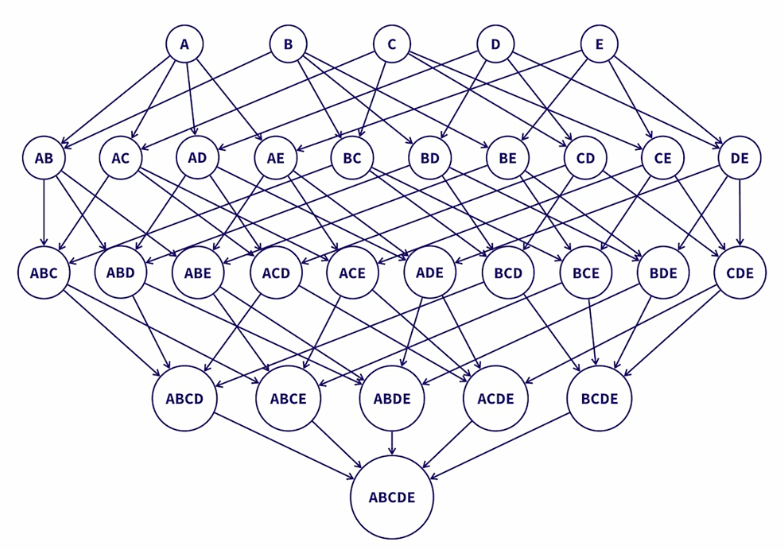

`If an itemset is found to be infrequent, then its supersets must also be infrequent. `

This means that if itemset A is found to be infrequent, then all of its supersets shown here in red are also infrequent. In other words, once we establish that A is infrequent, we do not have to bother evaluating the 15 itemsets that follow, because we know that they also will be infrequent. 

In general, frequent itemset generation using the Apriori algorithm occurs in two stages, In the first stage, the algorithm generates new candidate itemsets. Then, it eliminates candidate itemsets that do not meet the support threshold in the second stage. 

`Apriori Algorithm`
+ The Apriori algorithm generates frequesnt istemsets by recursively: 
    1) Generating new candidate itemsets based on the frequent itemsets from the previous iteration.
    2) Pruning the candidate itemsets using a support-based pruning strategy. 

To illustrate how the Apriori algorithm works, let's consider these 10 transactions from a corner fruit vendor. To keep things simple, we use letters of the alphabet to represent each of the seven fruit items in the data set. 

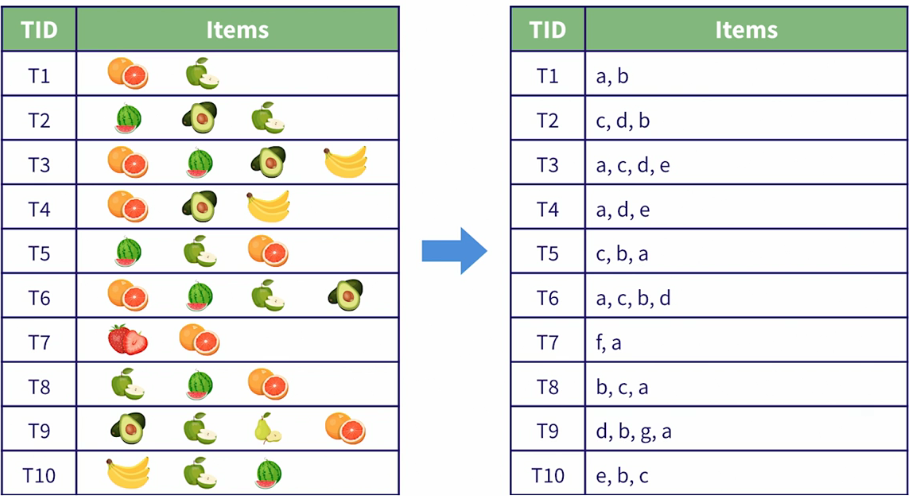

To begin, the apiorary algorithm generates candidate 1-itemsets from the transaction set. Note that a 1-itemset is simply an itemset with a length of one. 

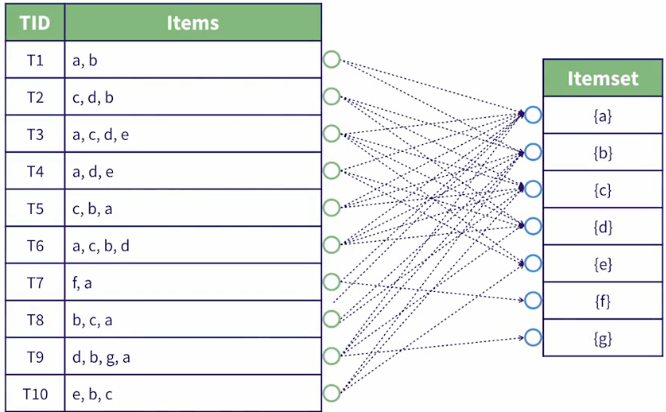

Next, the algorithm makes a pass through the data set to get the count for each candidate itemset. 

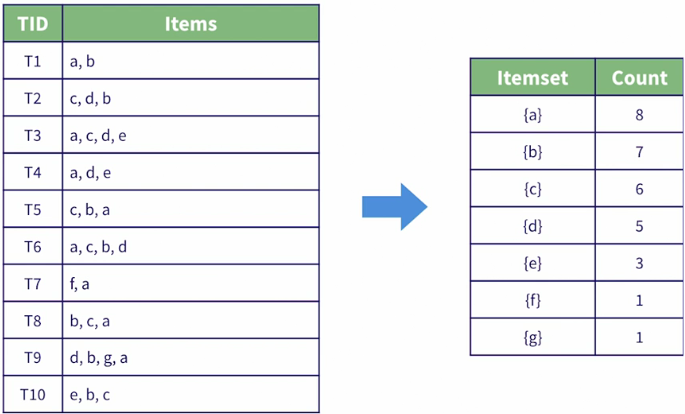

Let's assume that we set up support threshold to 0.2, or 20%. This means that each itemset must occur at least twice in the data to be frequent. Based on the support threshold, the algorithm eliminates the 2-itemsets that don't meet our criteria, itemsets F and G. The remaining five 1-itemsets are considered frequent. 

Next, the algorithm generates candidate 2-itemsets based on the frequent itemsets from the previous iteration. 

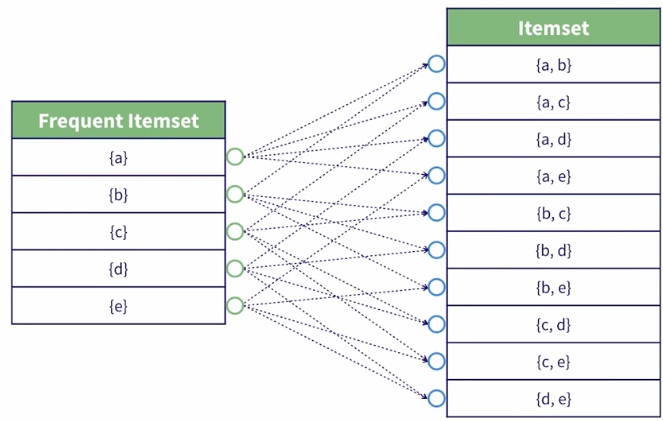

Then it makes a pass through the dataset to get a count for each candidate itemset. Based on the support threshold, it eliminates itemset BE. 

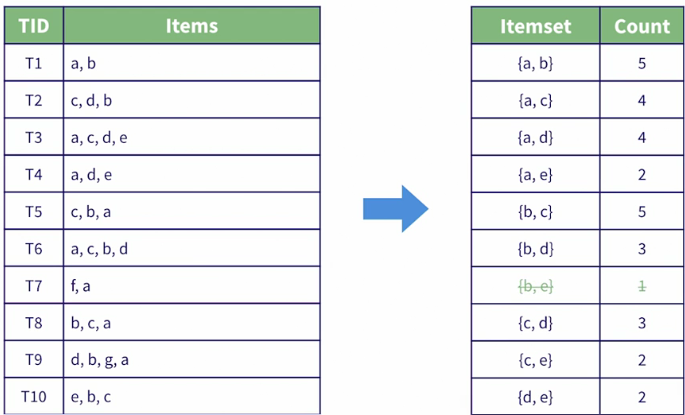


The remaining nine 2-itemsets are frequent. The process repeats for the 3-itemsets with candidate generation and pruning. This time, it eliminates 2-itemsets, and keeps five. Next, the algorithm uses the frequent itemsets from the previous iteration to generate candidate 4-itemsets. All three 4-itemsets are infrequent, so the process terminates. There are no new frequent itemsets to generate. 

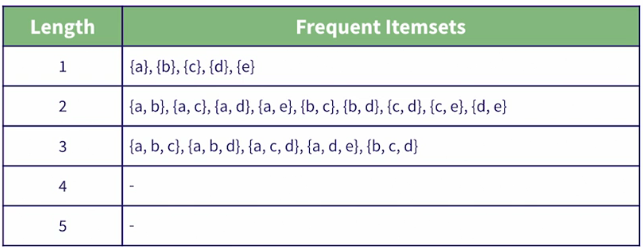

We only need to create association rules from these 19 frequent itemsets. 

`the Apriori Advantage`
+ Using the Apriori algorithm, we only created and evaluated 27 itemsets 
+ This is in contrast to the 127 candidate itemsets we could have created. 
+ A whopping 79% reduction in the number of candidate itemsets generated.

## The FP-Growth algorithm

Frequent item set generation is a useful approach in limiting our focus to just those rules which are potentially actionable. While more efficient than the brute force approach it is still computationally expensive. There are two common ways to reduce computational complexity during the process. 
- One approach is to reduce the number of candidates item sets that we create by leveraging the Apriori principle. That is what the Apriori algorithm does. 
- The other approach is to compress the data by storing the candidate's item sets in an advanced data structure, so that the frequent pattern tree or FP-tree. This is what the FP growth algorithm does. 

To illustrate how the FP growth algorithm works, let's consider these 10 transactions from a corner fruit vendor. To begin, the algorithm does some pre-processing. The first step is to get a count of each item listed in descending order of count as shown here. 

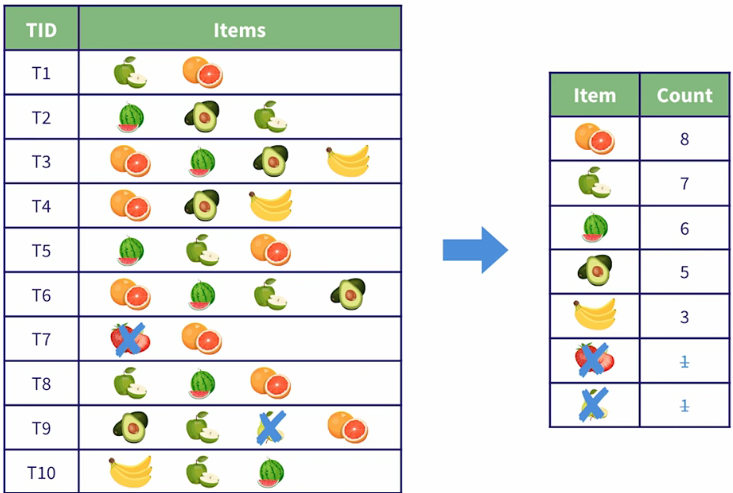

Let's assume our support threshold is set at 0.2 or 20%. This means that each item set must occur at least twice in the data to be frequent. Based on the support threshold, the algorithm eliminates the two items that don't meet our criteria, strawberries and pears, from the transaction set. 

Next, the algorithm source the transaction set based on the frequency of occurrence of each item. For example, in the first transaction, orange now comes before apple because orange occurs eight times while apple occurs seven times. 

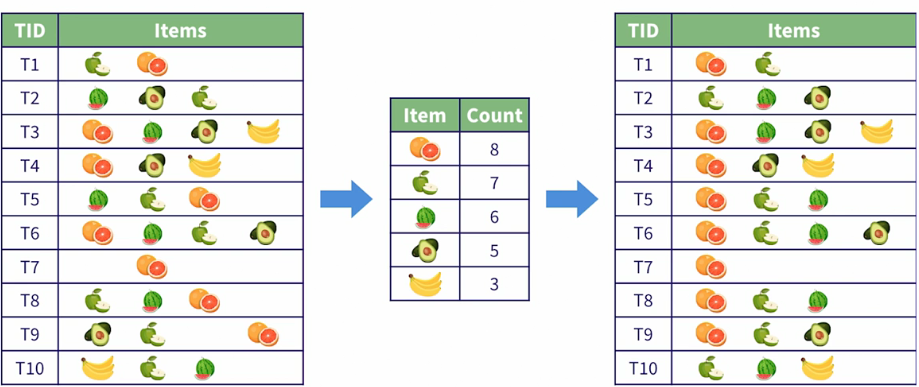

Similarly, in the second transaction, the order is now apple, watermelon, then avocado. 

To keep things simple, let's use the letters of the alphabet to represent each of the five remaining fruits items in the ordered transaction set. 

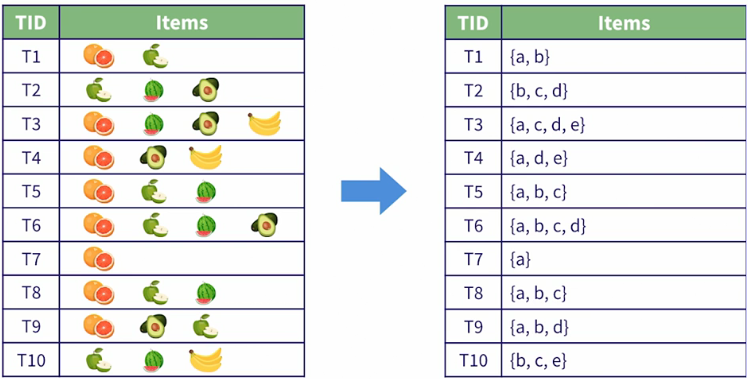

After the pre-processing stage, the FP growth algorithm reads each transaction in the data and encodes its path using a compact data structure called an FP-tree. 

After reading the first transaction, a new set of nodes labeled a: 1 and b: 1 are created. Note that each node is labeled with the name of an item and the running counts of how often the item occurs in the path. After reading the second transaction, a new set of nodes b, c, and d are created. Each node gets a count of one. Note that even though the first two transactions have b in common, their paths are disjoint because they do not share a common prefix. However, the third transaction does share a common prefix, a, with the first so the algorithm increments that count for node a. Then it creates a new set of nodes, c, d, and e, each with a count of one. The outcome is similar after the fourth transaction is read. New nodes d and e are created, while the count for a is incremented. The items in the fifth transaction share a common prefix, a, b with the first, so the FP growth algorithm updates the count for nodes a and b. Then it extends the path to include c. The algorithm continues encoding new paths until every transaction has been read and mapped onto the FP-tree, which ends up looking like this. 

`FP-Tree representation`
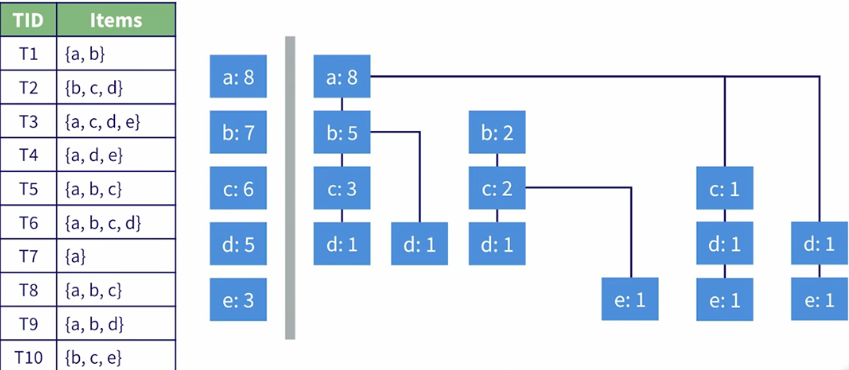


To extract frequent item sets from the FP-tree, the FP growth algorithm explores the tree in bottom up fashion. Given the tree shown above, the algorithm will first extract frequent item sets ending in ``e`, then in d, c, b and finally a.  

`Prefix Paths Ending in e, de, ce`
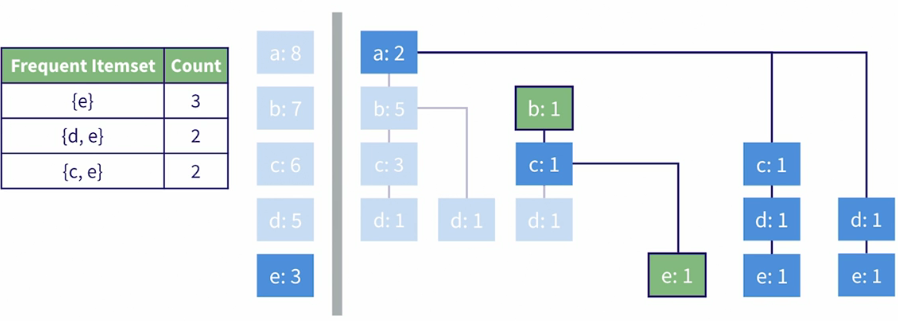

For example, to find all frequent item sets that end with e, the algorithm looks at all prefixed paths ending in e.Because some of the nodes were created from transactions that do not include e, the counts have to be updated as shown here. For example, nodes b and c include a path b, c, d that does not include e. Therefore, the counts for b and c were adjusted from two to one. Recall that our support threshold is set at 0.2 or 20%. Since there are three nodes for e, the item set e is considered frequent because its count meets or exceeds the minimum support threshold of two. 

Next item sets ``de`` is considered by looking at all prefixed paths with d and e. There are two paths with both d and e in the tree so item sets d, e is considered frequent. Next comes item sets c, e. There are also two paths with both c and e. So the item set is also considered frequent. Item sets ``be`` is considered next by looking at all prefixed paths ending in b and e. There is only one path with both b and e. This item set is not frequent since it does not meet the minimum support threshold of two. 

The FP growth algorithm continues this process for all remaining item sets ending in e, which are a, e, c, d, e, a, d, e, b, c, e, a, c, e, and a, c, d, e. After extracting the frequent item sets that end in ``e``, the algorithm proceeds to extract the frequent item sets that end in ``d`` by processing the paths within the FP-tree that end in ``d``. 

`Prefix Paths Ending in "d"`
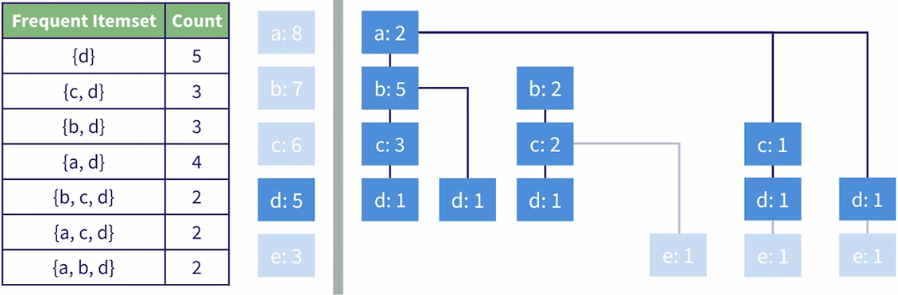

Then it extracts the frequent item sets that end in c, in b, and finally, those that end in a. When this process is complete, we end up with the 19 frequent item sets shown here. 

`Frequent Itemsets`

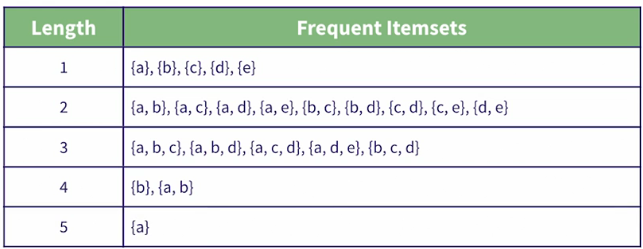

Note that these are the exact same frequent item sets we ended up with by using the Apriori algorithm in the previous paragraphs. 

The FP growth algorithm does have certain advantages over the Apriori algorithm. For one, it does not require the creation of candidates item sets. Instead, it extracts frequent item sets directly from an FP-tree, which is much faster. Secondly, unlike the Apriori algorithm whose runtime grows exponentially depending on the number of unique items in the transaction set, the run time of the FP growth algorithm only experiences a linear increase in run time with respect to the number of unique items in the data. Finally, because the FP-tree algorithm encodes transactions using a tree like data structure, transactions with common suffixes share a similar path which allows the data to be compressed. This means that the FP growth algorithm typically uses less storage than the Apriori algorithm.

`The FP-Growth Advantages`
- Unlike the Apriori algorithm, the FP-growth algorithm does not require candidate generation
- The algorithm is not significantly impacted by the presence of a large number of unique items
- The FP-tree compresses the data because it allows transaction with common suffixes to share a path. 


## Evaluating association rules

Association rules are very powerful. They can reveal interest in and previously hidden patterns within very large datasets. However, not all rules are created equal. For the most part, association rules can be classified as either trivial, inexplicable, or actionable. Most of the rules we generate will be trivial or inexplicable. Identifying which rules are actionable is not a trivial task, no pun intended. It often requires considerable time and effort. With the awareness that one person's trash is another person's treasure, we must decide what criteria to use when evaluating the association rules we create. These criteria will vary from person to person. Luckily, there are several objective data driven metrics that provide us with some guidance as we go through this process. We saw one of them in a previous video. It was called support. 

`Support`
+ The support of a rule is a fraction of transactions that contain the rule. 

We use support as a way to identify strong rules. This is because rules with low support are rules that don't occur a lot. They may occur simply by chance and are typically not actionable. Another metric that often is used to quantify the strength of an association rule is confidence. 

`Confidence`
+ The confidence of a rule is the predictive power or accuracy of the rule. 

The confidence of a rule is the support of the rule divided by the support of the antecedent. Recall that the antecedent x is the left side of a rule while the consequent y is the right side. The possible values for confidence range from zero to one. 

$$ Confidence_{X -> Y} = \frac{Support_{X -> Y}}{Support_{X}} $$

To illustrate how to calculate the confidence of a rule, let's consider this market basket dataset of five transactions. 

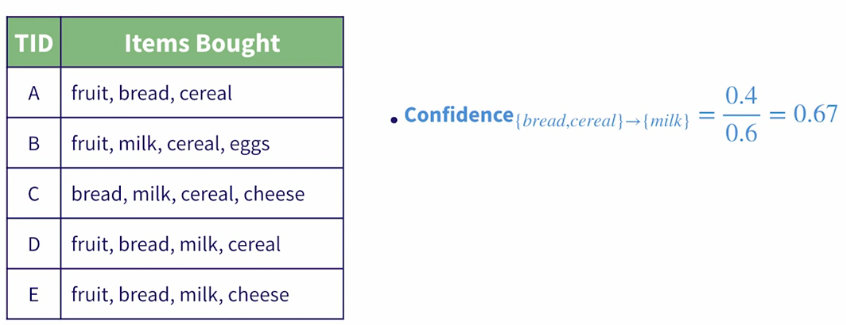

The confidence of the rule milk given bread, cereal is 0.4 divided by 0.6, which yields 0.67. 

Do you get how we got these numbers? Let me explain. 

0.4 is a support of the rule. Two out of the five transactions include bread, cereal and milk. They are transactions, C and D. 0.6 is the support of the antecedent, which is bread, cereal. There are three transactions that contain the item set bread, cereal. This means that the support of bread, cereal is three divided by five, which is 0.6. A confidence of 0.67 can be interpreted to mean that ``of all the transactions where both bread and cereal were purchased, 67% of them also included the purchase of milk``. 

The next metric is ``lift``. 

`Lift`
+ The lift of a rule is the increased likelihood of the rule occurring relative to its typical rate of occurrence.

Lift tells us how much more the antecedent and consequents occur together in contrast to how often they occur independently. In other words, lift is the strength of association. We compute the lift of a rule by dividing the confidence of the rule by the support of the consequent of the rule. 

$$ Lift_{X -> Y} = \frac{Confidence_{X -> Y}}{Support_{X}} $$


Lift values range from zero to infinity where a value of one indicates independence between the antecedent and the consequent. The lift of the rule milk given bread, cereal is 0.67 divided by 0.8, which yields 0.84. 0.67 is the confidence of the rule and 0.8 is the support of the consequent. 

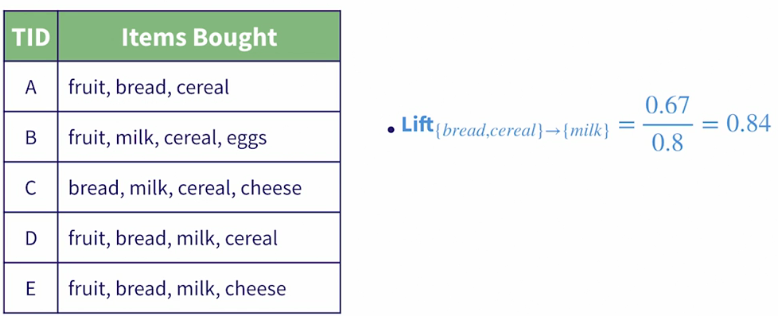

We can interpret a lift of 0.84 to mean that ``customers who bought bread and cereal are 16% less likely to also buy milk``. We subtracted the lift value from one to get the reduction in likelihood. This is because our lift value is less than one. If the lift value were more than one, we would interpret it as a multiplier of likelihood. For example, if our lift value were 2.4, this would mean that customers who bought bread and cereal are 2.4 times more likely to also buy milk. 

Leverage is similar to lift and can be thought of as a normalized value for lift. It shows the difference between the observed frequency of a rule and the frequency that would be expected if the antecedent and consequent were independent. 

`Leverage`
+ Leverage is the difference between the observed frequency of a rule and the frequency that would be expected if the antecedent and consequent were independent. 

Leverage values range from negative one to one where a value of zero indicates independence between the antecedent and the consequent. The leverage of a rule is calculated as a support of the rule minus the product of the support of the antecedent and the support of the consequent. 

$$ Leverage_{X -> Y} = Support_{X -> Y} - Support_{X} * Support_{Y} $$

The leverage of the rule milk given bread, cereal is negative 0.08. Because the leverage value is negative and relatively small, we interpret the leverage value to mean that ``customers who buy bread and cereal are slightly less likely to also buy milk``.

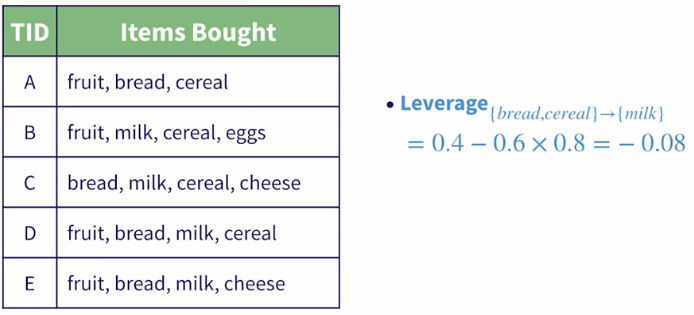

 Note that this is consistent with the lift score. If the leverage value were positive, then it would indicate an increased likelihood. 
 
 The next metric is known as conviction. Conviction quantifies how dependent the consequent is on the antecedent. It is also related to lift. 
 
 `Conviction`
 + Conviction quantifies how dependent the consequent is on the antecedent.
 
 Similar to lift, conviction values range from zero to infinity where a value of one indicates independence between the antecedent and the consequent. The higher the conviction, the more likely it is that the consequent is dependent on the antecedent and vice versa. 
 
 Conviction is calculated as one minus the support of the consequent divided by one minus the confidence of the rule. 
 
 $$ Conviction_{X -> Y} = \frac{1-Support_{Y}}{1-Confidence_{X -> Y}} $$
 
 The conviction of the rule milk given bread cereal is 0.61. We interpret the conviction value to mean that ``the rule milk given bread, cereal would be correct 39% more often if the consequent were dependent on the antecedent``. 
 
 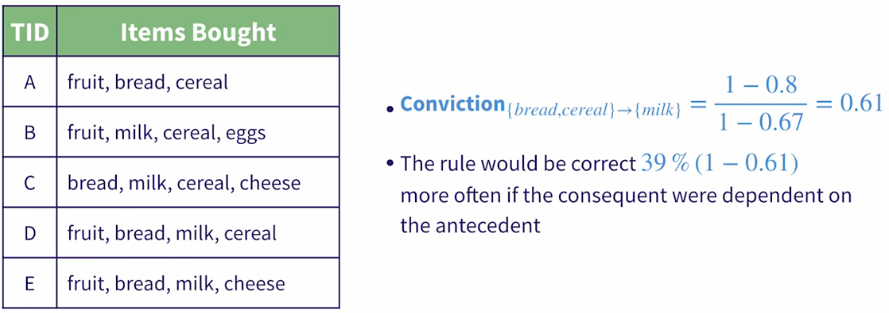
 
 In other words, the consequent is not that dependent on the antecedent. 
 
 The final metric we look at is called Zhang's metric. It quantifies the degree of association or dissociation between the antecedent and the consequent. 
 
 `Zang's Metric`
 + Zhang's metric quantifies the degree of association or dissociation between the antecedent and the consequent.
 
 The possible values for Zhang's metric range from negative one to one, which represent perfect association and perfect dissociation respectively. Zhang's metric is ``useful in identifying items that should not be placed next to each other even if they had been purchased together previously``. The formula for Zhang's metric is rather involved and is shown here. 
 
 $$ Zhang_{X -> Y} = \frac{Support_{X -> Y} - (Support_{X} * Support_{Y})}{max [Support_{X -> Y} * (1-Support_{X})], [Support_{X} * (Support_[Y]-Support_{X -> Y})]} $$
 
 
 The Zhang metric for the rule milk given bread, cereal is negative 0.33. 
 
 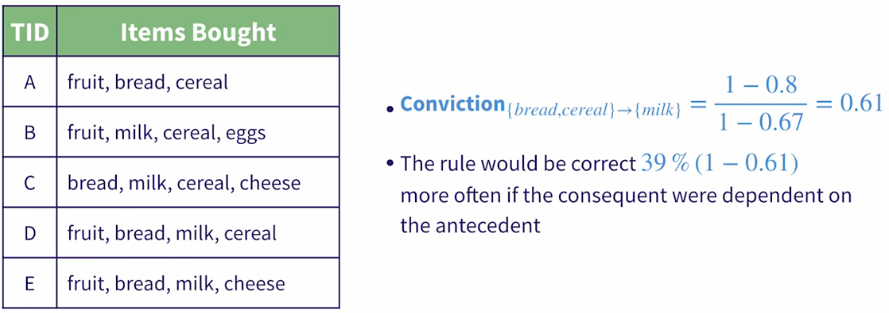
 
 This indicates a moderate dissociation between milk and both bread and cereal. Because these item sets are dissociated, the takeaway would be to separate them in the store. Doing so would have a moderate impact on purchase patterns for both item sets.

## Why and when to use association rules

In order to know when to use association rules, we need to understand their strengths and weaknesses. 

`STRENGTS`
+ Association rules work very well with big data. 
+ Association rules are easy to understand.
+ Association rules are very useful for a variety of data mining tasks.

In terms of strengths, association rules are very good with big data: the larger the better. The more occurrences there are of a particular rule within a dataset, the more interesting the rule is, and the more likely it is that the rule is actionable. The simple if/then syntax of an association rule makes it very easy to understand and communicate. The left hand side of a rule, which is known as antecedent, is the condition that needs to be met, while the right hand side of the rule, which is known as a consequence, is expected result of meeting the condition. 

Association rules are very useful for data mining tasks, such as discovering unexpected or previously hidden patterns within a dataset. While commonly used for market basket analysis, association rules are useful in identifying patterns of co-occurrence in a wide variety of domains. Association rules have been used to identify frequently occurring patterns of DNA and protein sequences in cancer cells. They have also been used to find patterns of medical claims that occur in combination with fraudulent credit card use, and they have also been used to identify patterns of behavior that proceed customer changes to cable TV subscriptions. 

There are some weaknesses inherent with association rules as well. 

`WEAKNESSES`
+ Association rules are not very useful with small datasets. 
+ Separating true insight from noise is nontrivial.
+ It is easy to draw misleading conclusions from association rules.

Association rules are not very useful when working with small datasets. The fewer the number of occurrences of a rule, the less interesting it is. This is because rules that occur infrequently could simply occur by chance and are typically not actionable. It is sometimes difficult to properly separate true insight from common sense when evaluating association rules. Most rules generated during association rule mining are trivial or inexplicable. Identifying rules which are truly actionable often requires domain knowledge and a significant amount of effort. Because one person's trash is another's treasure, the insight derived from association rules can be very subjective. If care is not taken, one can easily draw misleading or incorrect conclusions from random patterns in the data.